In [30]:
import numpy as np
import pandas as pd
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [31]:
# Reading only Listing data from Boston Airbnb data 
data_Listing = read_csv('listings.csv')
data_Listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [32]:
data_Listing.shape

(3585, 95)

In [3]:
# Extracted some Columns 
columns = ['id',  'name', 'summary','space', 'description', 
           'neighbourhood_cleansed', 'city', 'latitude', 'longitude',
           'property_type', 'room_type', 'accommodates','bathrooms', 'bedrooms', 'amenities',
           'price', 'cleaning_fee','number_of_reviews','cancellation_policy', 
           'reviews_per_month']
new_data_Listing = data_Listing[columns]
new_data_Listing.head()

,id,name,summary,space,description,neighbourhood_cleansed,city,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,amenities,price,cleaning_fee,number_of_reviews,cancellation_policy,reviews_per_month
0,12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",Roslindale,Boston,42.282619,-71.133068,House,Entire home/apt,4,1.5,2.0,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$250.00,$35.00,0,moderate,NaN
1,3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,Roslindale,Boston,42.286241,-71.134374,Apartment,Private room,2,1.0,1.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$65.00,$10.00,36,moderate,1.30
2,6976,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",Roslindale,Boston,42.292438,-71.135765,Apartment,Private room,2,1.0,1.0,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",$65.00,NaN,41,moderate,0.47
3,1436513,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,Roslindale,Boston,42.281106,-71.121021,House,Private room,4,1.0,1.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$75.00,$50.00,1,moderate,1.00
4,7651065,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",Roslindale,Boston,42.284512,-71.136258,House,Private room,2,1.5,1.0,"{Internet,""Wireless Internet"",""Air Conditionin...",$79.00,$15.00,29,flexible,2.25


In [4]:
#checking null values
new_data_Listing.isnull().sum()

id                           0
name                         0
summary                    143
space                     1057
description                  0
neighbourhood_cleansed       0
city                         2
latitude                     0
longitude                    0
property_type                3
room_type                    0
accommodates                 0
bathrooms                   14
bedrooms                    10
amenities                    0
price                        0
cleaning_fee              1107
number_of_reviews            0
cancellation_policy          0
reviews_per_month          756
dtype: int64

In [5]:
# data contains 3585 rows and 20 columns 
new_data_Listing.shape

(3585, 20)

In [6]:
# deleting all rows where 'bathrooms','bedrooms','city','property_type' are null
data_listing_col = new_data_Listing.dropna(axis=0, subset =['bathrooms','bedrooms','city','property_type'])
data_listing_col.shape

(3556, 20)

In [7]:
data_listing_col.isnull().sum()

id                           0
name                         0
summary                    126
space                     1053
description                  0
neighbourhood_cleansed       0
city                         0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
amenities                    0
price                        0
cleaning_fee              1091
number_of_reviews            0
cancellation_policy          0
reviews_per_month          751
dtype: int64

In [8]:
# Filling Null values of 'space' and 'summary' column with "No_comment".
# Filling Null values of 'cleaning_fee' and 'reviews_per_month' column with 0 value. 
data_listing_col['space'] = data_listing_col['space'].fillna("No_comment")
data_listing_col['summary'] = data_listing_col['summary'].fillna("No_comment")
data_listing_col['cleaning_fee'] =  data_listing_col['cleaning_fee'].fillna(0)
data_listing_col['reviews_per_month'] = data_listing_col['reviews_per_month'].fillna(0)

/Users/prediction/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/prediction/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/prediction/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be 

In [9]:
data_listing_col.isnull().sum() # no more null values left

id                        0
name                      0
summary                   0
space                     0
description               0
neighbourhood_cleansed    0
city                      0
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
amenities                 0
price                     0
cleaning_fee              0
number_of_reviews         0
cancellation_policy       0
reviews_per_month         0
dtype: int64

In [10]:
# data doesn't contain any null values now 
# 'Price column contains '$' sign - need to remove it.
price1 = data_listing_col["price"].str.split("$", n = 1, expand = True)
price1.head()

,0,1
0,,250.00
1,,65.00
2,,65.00
3,,75.00
4,,79.00


In [11]:
data_listing_col['Price_new'] = price1[1]
data_listing_col.isnull().sum()
#df1 = data_listing_col.drop('price', axis=1)
#df1.head()

/Users/prediction/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


id                        0
name                      0
summary                   0
space                     0
description               0
neighbourhood_cleansed    0
city                      0
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
amenities                 0
price                     0
cleaning_fee              0
number_of_reviews         0
cancellation_policy       0
reviews_per_month         0
Price_new                 0
dtype: int64

In [12]:
df1 = data_listing_col.drop('price', axis=1)
df1.head()

,id,name,summary,space,description,neighbourhood_cleansed,city,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,amenities,cleaning_fee,number_of_reviews,cancellation_policy,reviews_per_month,Price_new
0,12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",Roslindale,Boston,42.282619,-71.133068,House,Entire home/apt,4,1.5,2.0,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$35.00,0,moderate,0.00,250.00
1,3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,Roslindale,Boston,42.286241,-71.134374,Apartment,Private room,2,1.0,1.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$10.00,36,moderate,1.30,65.00
2,6976,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",Roslindale,Boston,42.292438,-71.135765,Apartment,Private room,2,1.0,1.0,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",0,41,moderate,0.47,65.00
3,1436513,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,Roslindale,Boston,42.281106,-71.121021,House,Private room,4,1.0,1.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$50.00,1,moderate,1.00,75.00
4,7651065,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",Roslindale,Boston,42.284512,-71.136258,House,Private room,2,1.5,1.0,"{Internet,""Wireless Internet"",""Air Conditionin...",$15.00,29,flexible,2.25,79.00


In [14]:
df1['property_type'].unique()

array(['House', 'Apartment', 'Condominium', 'Villa', 'Bed & Breakfast',
       'Townhouse', 'Entire Floor', 'Loft', 'Guesthouse', 'Boat', 'Dorm',
       'Other', 'Camper/RV'], dtype=object)

In [15]:
#some data cleaning for the column 'cleaning_fee' and removing ',' &'$' sign
df1['cleaning_fee'] = df1['cleaning_fee'].str.replace(',', '')
df1['cleaning_fee'] = df1['cleaning_fee'].str.replace('$', '')
df1['cleaning_fee'] = df1['cleaning_fee'].fillna(0)
#df1['cleaning_fee'] = df1['cleaning_fee'].astype(int)


In [16]:
df1['Price_new'] = df1['Price_new'].str.replace(',', '')
df1['Price_new'] = df1['Price_new'].astype(float)

In [17]:
#from pandas import DataFrame
#df1.to_csv('/Users/prediction/Downloads/airb.csv')

{'whiskers': [<matplotlib.lines.Line2D at 0x115f8f190>,
 'caps': [<matplotlib.lines.Line2D at 0x115fb3850>,
 'boxes': [<matplotlib.lines.Line2D at 0x115f9f250>],
 'medians': [<matplotlib.lines.Line2D at 0x115fb39d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x112d48f10>],
 'means': []}

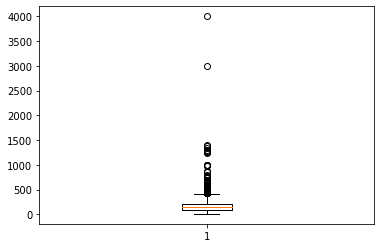

In [18]:
df2 = df1
df2.head()
plt.boxplot(df2.Price_new)

In [19]:
# There are only two outliers having values 3000 and 4000 so we are removing it.
df1.shape
df1 = df1[(df1.Price_new < 2000)] 
df1.shape

(3554, 20)

Text(0.5, 1.0, 'Number of Listings in Each Neighbourhood')

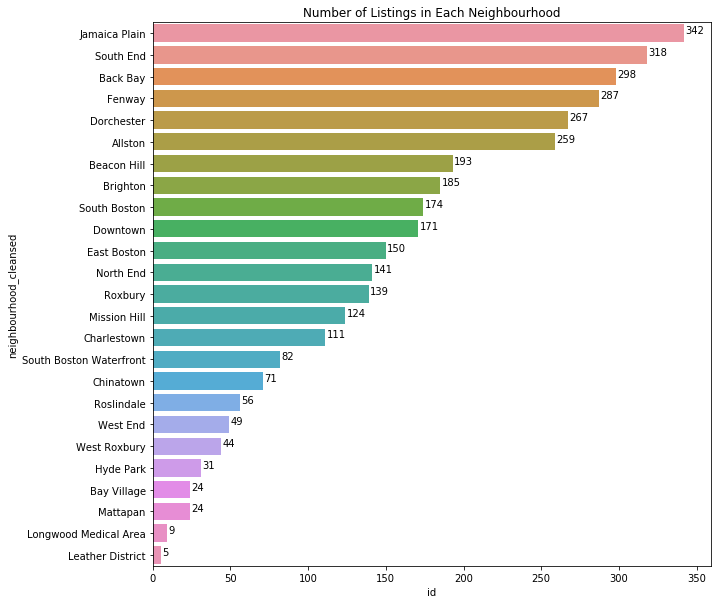

In [26]:
rankingsumbyneighbour = df1.groupby(by='neighbourhood_cleansed').count()[['id']].sort_values(by='id', ascending=False)

# print(neighborRank)
plt.figure(figsize=(10,10))
g = sns.barplot(x=neighborRank["id"],y=rankingsumbyneighbour.index)
# The line below adds the value label in each bar
[g.text(p[1]+1,p[0],p[1], color='black') for p in zip(g.get_yticks(), rankingsumbyneighbour["id"])]
plt.title('Total Number of Listings in Each Neighbourhood')



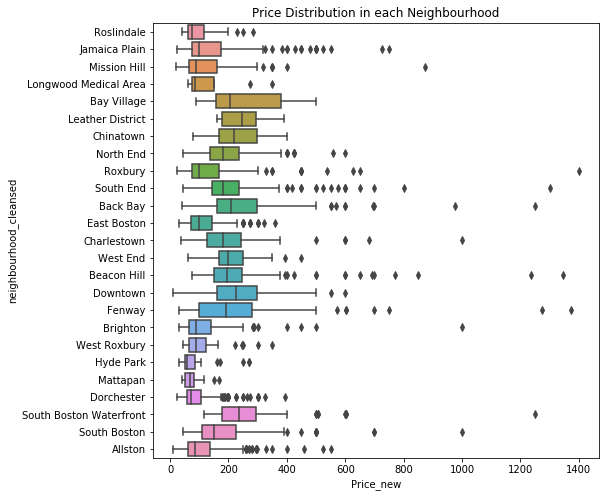

In [34]:
# Boxplot between 'Price_new' and 'neighbourhood_cleansed'
x = 'Price_new'
y = 'neighbourhood_cleansed'
plt.figure(figsize = (8,8,))
ax = sns.boxplot(x=x, y=y, data= df1)
plt.title('Price Distribution in each Neighbourhood')
plt.show()

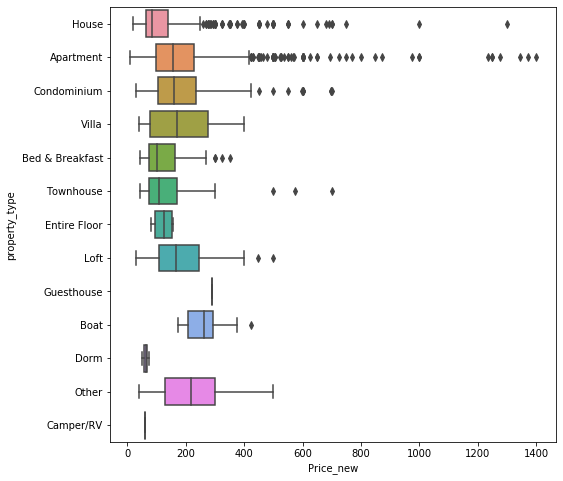

In [35]:
# Boxplot between 'Price_new' and 'neighbourhood_cleansed'
import seaborn as sns

x = 'Price_new'
y = 'property_type'
plt.figure(figsize = (8,8,))
ax = sns.boxplot(x=x, y=y, data= df1)
plt.show()

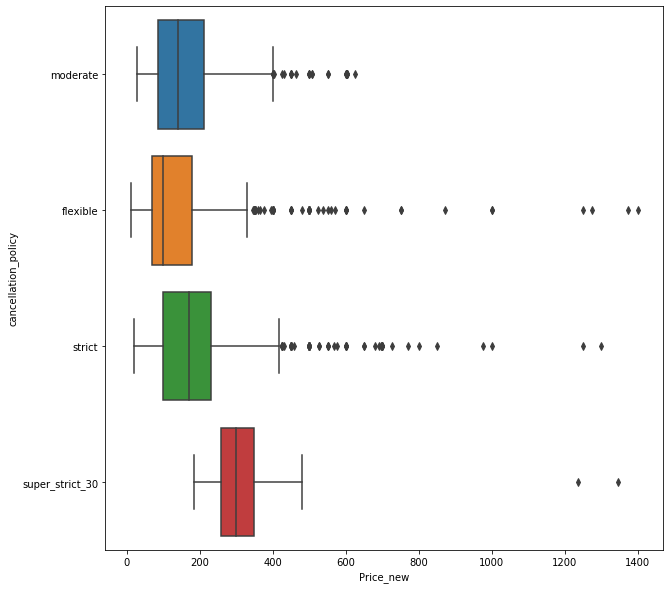

In [170]:
# Boxplot between 'Price_new' and 'neighbourhood_cleansed'
import seaborn as sns

x = 'Price_new'
y = 'cancellation_policy'
plt.figure(figsize = (10,10,))
ax = sns.boxplot(x=x, y=y, data= df1)
plt.show()

In [180]:
###########################
# Information Retrieval 

In [189]:
#Dropping NULL values from 'summary column'
data_listing_col = new_data_Listing.dropna(axis=0, subset =['summary'])
data_listing_col.shape

(3442, 20)

In [190]:
data_listing_col.isnull().sum()
new_data = data_listing_col
new_data.head()
new_data.isnull().sum()

id                           0
name                         0
summary                      0
space                     1057
description                  0
neighbourhood_cleansed       0
city                         2
latitude                     0
longitude                    0
property_type                3
room_type                    0
accommodates                 0
bathrooms                    5
bedrooms                     2
amenities                    0
price                        0
cleaning_fee              1049
number_of_reviews            0
cancellation_policy          0
reviews_per_month          744
dtype: int64

In [191]:
columns = ['summary',  'room_type', 'bathrooms','bedrooms', 'price', 
           'cancellation_policy','amenities','name']
new_data1 = data_listing_col[columns]

new_data1 = new_data1.dropna(axis=0, subset =['bathrooms','bedrooms'])
new_data1.isnull().sum()

summary                0
room_type              0
bathrooms              0
bedrooms               0
price                  0
cancellation_policy    0
amenities              0
name                   0
dtype: int64

In [192]:
import re
import scipy
from collections import Counter
%matplotlib inline

In [193]:
# Perform some basic cleaning and character removal.

# Make everything lower case.
new_data1['summary'] = new_data1['summary'].str.lower()

# Remove all characters like ",","!","?","\"
new_data1['summary'] = new_data['summary'].str.replace(r'\.|\!|\?|\'|,|-|\(|\)', "",)

# Fill in black reviews with '' 
new_data1['summary'] = new_data1['summary'].fillna('')

In [194]:
# Import and initiate a vectorizer.
from sklearn.feature_extraction.text import CountVectorizer

# The max features is how many words we want to allow us to create columns for.
vectorizer = CountVectorizer(max_features=5000)

In [195]:
# Vectorize our reviews to transform sentences into volumns.
X = vectorizer.fit_transform(new_data1['summary'])

# And then put all of that in a table.
bag_of_words = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [29]:
# Join our bag of words back to our initial hotel data.
#full_df = new_data1.join(bag_of_words)

In [197]:
# X is our words.
X = bag_of_words

# Y is our hotel name (the outcome we care about).
Y_room = new_data1['name']

In [198]:
# Import a random forest model.
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# Fit that random forest model to our data.
rfc.fit(X,Y_room)

/Users/prediction/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
# Write your own dream vacation review here...
test_review = ['''
    I want a room with view
    ''']

In [73]:
# Convert your test review into a vector.
X_test = vectorizer.transform(test_review).toarray()

In [74]:
# Match your review.
prediction = rfc.predict(X_test)[0]

In [75]:
# Return the essential information about your match.
new_data1[new_data1['name'] == prediction][['name', 'summary', 
                                        'price', 'amenities']].head(1)

,name,summary,price,amenities
1246,[1716-1/2]Brand New 1BR in Back Bay,,$259.00,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
